# Support Vector Machine (SVM)

In [ ]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
import torch

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Estabelecendo o ambiente de Execução
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Executando no dispositivo: {device}")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

Executando no dispositivo: cuda


## 1. Descrição do Modelo

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(
    probability=True,
    random_state=RANDOM_STATE
)

O SVM é um algoritmo de aprendizado supervisionado que busca encontrar o hiperplano que melhor separa as diferentes classes nos dados. Assim, o hiperplano ideal é aquele que maximiza a margem entre as classes, ou seja, a distância entre o hiperplano e os pontos de dados mais próximos de cada classe (vetores de suporte). A partir dessas características, o  SVM pode lidar com dados linearmente separáveis e não linearmente separáveis, utilizando o truque do kernel para mapear os dados em um espaço de maior dimensão.

## 2. Configuração de Hiperparâmetros

In [5]:
param_distributions_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5],
}

Para o Support Vector Machine avaliamos os seguintes hiperparâmetros: C, kernel, gamma, degree, coef0. O parâmetro **C**, variando entre 0.1 e 100, controla a penalidade por erros de classificação, valores baixos de **C** resultam em uma margem mais ampla, mas podem tolerar mais erros, enquanto valores mais altos buscam classificar todos os pontos corretamente, podendo levar a overfitting. 

Nessa Hiato, a escolha do **kernel** entre **'linear', 'rbf', 'poly' e 'sigmoid'** permite explorar diferentes formas de mapear os dados para um espaço de maior dimensão, onde a separação linear pode ser mais fácil. O kernel linear é adequado para dados linearmente separáveis, enquanto os kernels 'rbf', 'poly' e 'sigmoid' são usados para dados não linearmente separáveis. Provavelmente esses outros Kernels terão melhor desempenho, uma vez que na Fase 2, percebemos que o problema não era linearmente separável.

Já para o parâmetro gamma, variando entre 'scale', 'auto', 0.001, 0.01 e 0.1, controla a influência de cada ponto de dados. 'scale' e 'auto' ajustam automaticamente o gamma com base nos dados, enquanto os valores numéricos permitem explorar diferentes níveis de influência. Um gamma muito baixo pode levar a um modelo underfitting, enquanto um gamma muito alto pode levar a um modelo overfitting.

O parâmetro degree, variando entre 2, 3 e 4, é relevante apenas para o kernel **polinomial** e controla o grau do polinômio. Essa variação permite explorar diferentes níveis de complexidade na função polinomial.

Por fim, o parâmetro coef0, variando entre 0.0, 0.1 e 0.5, é relevante para os kernels **polinomial** e **sigmoid** e controla o termo independente na função do kernel. A variação permite ajustar a influência desse termo na função de decisão.

## 3. Avaliação do Modelo

O modelo **SVM** foi configurado com parâmetros específicos para otimizar sua capacidade de classificação, incluindo o uso do kernel **polinomial**, **C = 100**, e a função de decisão **ovr** (one-vs-rest). Esses parâmetros foram escolhidos com a intenção de melhorar a flexibilidade do modelo, permitindo capturar relações não-lineares complexas nos dados. No entanto, apesar de apresentar uma acurácia de aproximadamente **78%** no conjunto de treinamento, o modelo teve dificuldades em alcançar resultados similares em validação e teste, com uma **acurácia** que não superou **77%** em nenhum dos conjuntos. Isso reflete que o modelo SVM não conseguiu se adaptar bem a todos os dados, apresentando uma performance abaixo de outros modelos testados.
**Curva ROC e Matriz de Confusão:**

A **curva ROC** do modelo SVM mostrou um desempenho moderado, com a área sob a curva (**AUC**) alcançando **0.7559** no melhor modelo. Apesar disso, o modelo não conseguiu melhorar de forma significativa a taxa de verdadeiros positivos (**TPR**), o que pode indicar que a capacidade de discriminação do modelo está abaixo do ideal. A **matriz de confusão** revelou que o modelo cometeu erros significativos ao classificar os dados. Por exemplo, teve uma maior dificuldade em identificar corretamente os casos de **subida**, onde classificou erroneamente como **queda**. Esses erros indicam uma necessidade de ajustes, possivelmente nos hiperparâmetros ou na escolha do kernel.

**Métricas de Desempenho entre os modelos:**

Em termos de **variação das métricas**, o modelo SVM mostrou **alta estabilidade** nas métricas de desempenho, com variações pequenas entre as diferentes iterações dos testes, com uma esceção no modelo 13. No entanto, apesar dessa estabilidade, os resultados foram consistentemente **mais baixos** em comparação com os outros modelos avaliados. A **acurácia** de treinamento foi de **78.35%**, mas o modelo não conseguiu superar **77.65%** em dados de validação e teste, o que reflete uma dificuldade do SVM em se ajustar adequadamente aos dados fora do conjunto de treinamento. A **média das métricas** também foi abaixo dos melhores valores obtidos, destacando que, embora o modelo tenha mostrado um bom comportamento estável em diferentes cenários, ele não conseguiu alcançar os melhores resultados em termos de **precisão** e **recall**. Além disso, o **tempo de execução** foi uma preocupação, já que o modelo levou cerca de **240 minutos** para ser executado, o que pode ser um obstáculo em situações práticas, especialmente quando lidamos com grandes volumes de dados.

**Desempenho Cross Validation:**

Apesar das dificuldades no desempenho geral, o modelo SVM mostrou **boa estabilidade** durante os **K-Folds**. A variação entre os diferentes folds foi pequena, com os valores do melhor modelo variando entre **0.852** e **0.866**, e as métricas médias variando entre **0.834** e **0.848**. Isso indica que, embora o modelo tenha mostrado uma grande **oscillação** nas métricas, ele foi relativamente estável em termos de desempenho, o que sugere que, embora haja uma margem significativa para melhorias, o modelo pode ser adequado para cenários onde alguma variação nos dados é esperada. No entanto, os resultados indicam que ajustes finos, como a seleção de outros kernels ou ajustes de hiperparâmetros, podem ser necessários para melhorar a performance de classificação.
**Métricas do Melhor modelo:**

| **Métrica** | **Melhor Valor Geral** | **Média** | **Desvio Padrão** | **Valor no Modelo Selecionado** |
| --- | --- | --- | --- | --- |
| **Accuracy Train** | 0.7835 | 0.7712 | 0.0112 | 0.7835 |
| **Accuracy Val** | 0.7710 | 0.7583 | 0.0093 | 0.7710 |
| **Accuracy Test** | 0.7765 | 0.7692 | 0.0088 | 0.7758 |
| **F1 Score** | 0.7022 | 0.6853 | 0.0210 | 0.7022 |
| **AUC** | 0.7559 | 0.7456 | 0.0125 | 0.7559 |
| **Recall** | 0.6479 | 0.6175 | 0.0334 | 0.6479 |

**Melhor Combinação de Hiperparâmetros:**

```python
{'C': 100, 
 'coef0': 0.5,
 'degree': 4, 
 'gamma': 'auto', 
 'kernel': 'poly'}
```


In [6]:
result, model, cv, loss, all_cv = runner.search_paramsv2(
    svm_model,param_distributions_svm,'svm',
[X_train, Y_train, X_val, Y_val, X_test, Y_test], n_iter=20, verbose=3)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, '...",0.847261,43.432133,0.775319,0.759503,0.773662,0.694418,0.630346,0.751386,"[0.0, 0.12757367783609205, 1.0]","[0.0, 0.6303456356180434, 1.0]",./models/svm/0.pkl
1,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.839115,43.659980,0.771374,0.756156,0.768403,0.684056,0.614528,0.744487,"[0.0, 0.12555510698425515, 1.0]","[0.0, 0.6145284124194493, 1.0]",./models/svm/1.pkl
2,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2...",0.851406,42.889980,0.779161,0.762611,0.776530,0.700032,0.639133,0.755174,"[0.0, 0.12878482034719418, 1.0]","[0.0, 0.6391329818394845, 1.0]",./models/svm/2.pkl
3,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, '...",0.847261,43.466919,0.775319,0.759503,0.773662,0.694418,0.630346,0.751386,"[0.0, 0.12757367783609205, 1.0]","[0.0, 0.6303456356180434, 1.0]",./models/svm/3.pkl
4,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.850451,73.972747,0.777266,0.764523,0.774618,0.695315,0.630346,0.752193,"[0.0, 0.12595882115462254, 1.0]","[0.0, 0.6303456356180434, 1.0]",./models/svm/4.pkl
5,"{'kernel': 'poly', 'gamma': 0.01, 'degree': 2,...",0.810516,28.263736,0.747656,0.737031,0.752390,0.655356,0.577036,0.725135,"[0.0, 0.12676624949535728, 1.0]","[0.0, 0.5770357352079672, 1.0]",./models/svm/5.pkl
6,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.827420,45.791985,0.760975,0.748984,0.764818,0.676529,0.602812,0.739638,"[0.0, 0.12353653613241825, 1.0]","[0.0, 0.6028119507908611, 1.0]",./models/svm/6.pkl
7,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.823024,28.434378,0.761436,0.747789,0.765296,0.682817,0.619215,0.742591,"[0.0, 0.13403310456197012, 1.0]","[0.0, 0.6192149970708846, 1.0]",./models/svm/7.pkl
8,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.839115,42.622562,0.771374,0.756156,0.768403,0.684056,0.614528,0.744487,"[0.0, 0.12555510698425515, 1.0]","[0.0, 0.6145284124194493, 1.0]",./models/svm/8.pkl
9,"{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.859408,494.598930,0.783464,0.770978,0.775813,0.702222,0.647920,0.755934,"[0.0, 0.13605167541380703, 1.0]","[0.0, 0.6479203280609256, 1.0]",./models/svm/9.pkl


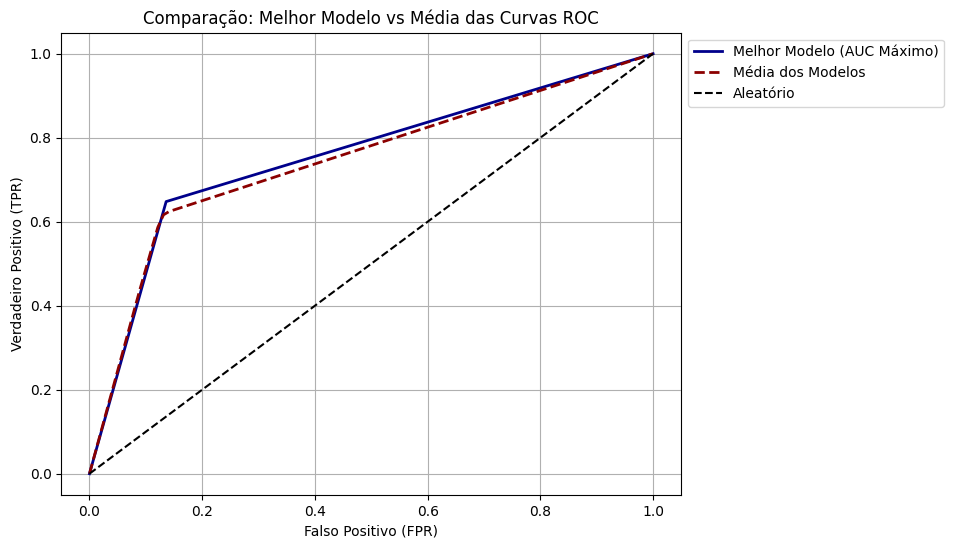

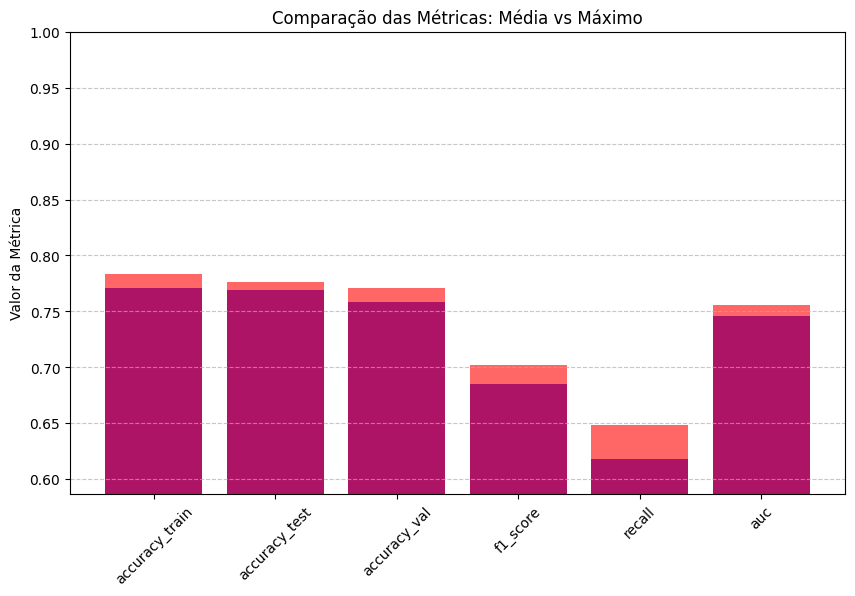

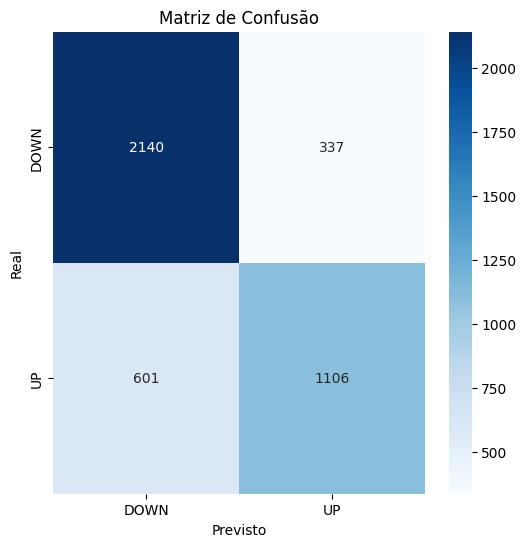

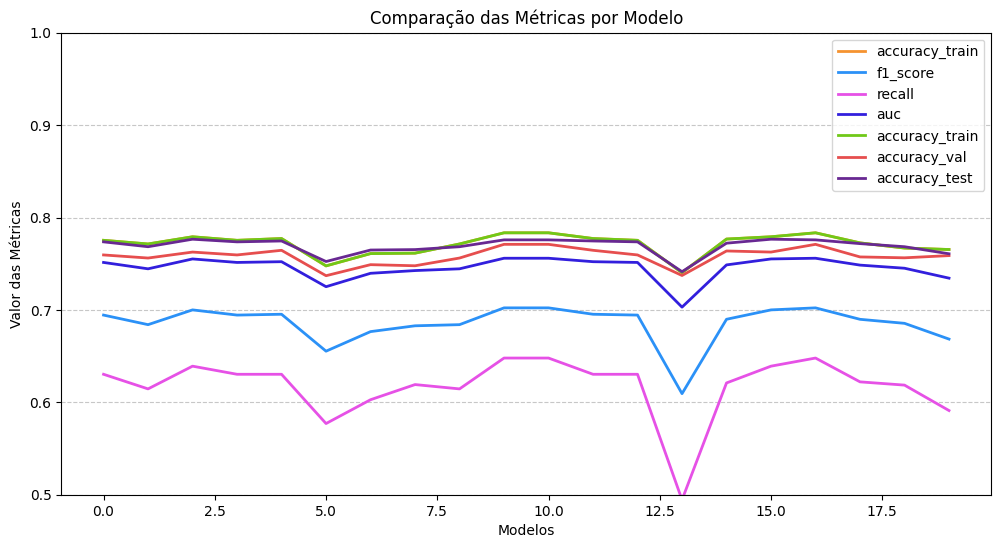

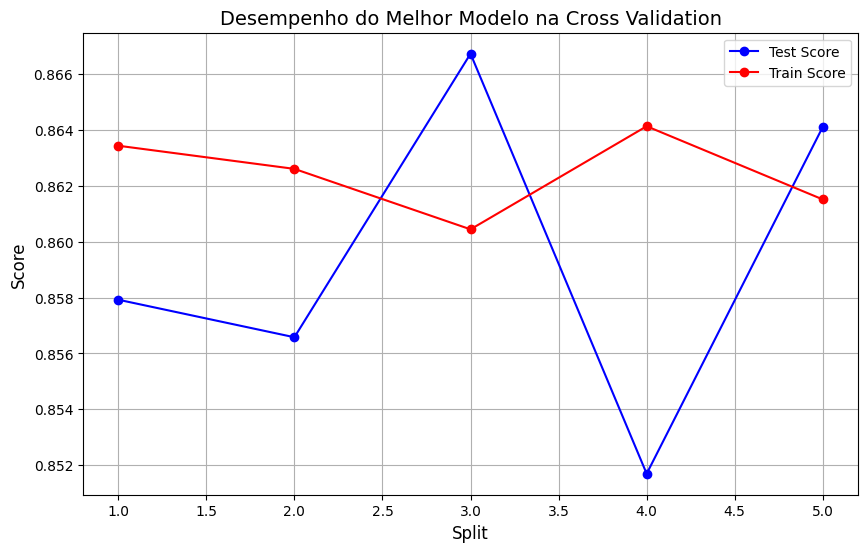

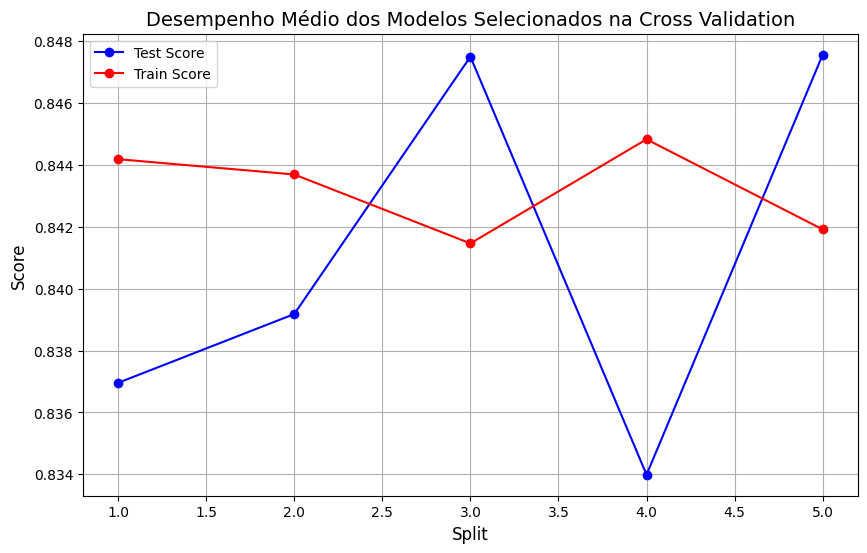

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.5, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': 51, 'shrinking': True, 'tol': 0.001, 'verbose': False}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 0.7835
  - **Média**: 0.7712
  - **Desvio Padrão**: 0.0112
  - **Valor no Modelo Selecionado**: 0.7835

- **Accuracy val**:
  - **Melhor valor geral**: 0.7710
  - **Média**: 0.7583
  - **Desvio Padrão**: 0.0093
  - **Valor no Modelo Selecionado**: 0.7710

- **Accuracy test**:
  - **Melhor valor geral**: 0.7765
  - **Média**: 0.7692
  - **Desvio Padrão**: 0.0088
  - **Valor no Modelo Selecionado**: 0.7758

- **F1 score**:
  - **Melhor valor geral**: 0.7022
  - **Média**: 0.6853
  - **Desvio Padrão**: 0.0210
  - **Valor no Modelo Selecionado**: 0.7022

- **Auc**:
  - **Melhor valor geral**: 0.7559
  - **Média**: 0.7456
  - **Desvio Padrão**: 0.0125
  - **Valor no Modelo Selecionado**: 0.7559

- **Recall**:
  - **Melhor valor geral**: 0.6479
  - **Média**: 0.6175
  - **Desvio Padrão**: 0.0334
  - **Valor no Modelo Selecionado**: 0.6479



In [9]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df, y_min=0.5)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))